In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
import pickle

In [12]:
with open('../dataset/2019_week.pkl', 'rb') as f:
    df2019_week = pickle.load(f)
    
with open('../dataset/2019_hol.pkl', 'rb') as f:
    df2019_hol = pickle.load(f)
    
with open('../dataset/2020_week.pkl', 'rb') as f:
    df2020_week = pickle.load(f)
    
with open('../dataset/2020_hol.pkl', 'rb') as f:
    df2020_hol = pickle.load(f)

In [4]:
df2019_week.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,type,times,year,month,day,dayofweek,hour,month-day
0,437,2019-01-02 00:02:29,126,2019-01-02 00:04:44,135.0,410.0,BIL_004,M,AGE_003,Regular,1H,2019,1,2,Wed,0,0 1\n1 1\n2 1...
1,747,2019-01-02 00:00:41,726,2019-01-02 00:05:15,274.0,660.0,BIL_006,\N,AGE_002,Daily,1H,2019,1,2,Wed,0,0 1\n1 1\n2 1...
2,1149,2019-01-02 00:01:25,1112,2019-01-02 00:05:41,256.0,800.0,BIL_006,\N,AGE_002,Daily,1H,2019,1,2,Wed,0,0 1\n1 1\n2 1...
3,2025,2019-01-02 00:02:27,2040,2019-01-02 00:05:50,203.0,590.0,BIL_014,M,AGE_002,Regular,2H,2019,1,2,Wed,0,0 1\n1 1\n2 1...
4,1448,2019-01-02 00:01:08,1442,2019-01-02 00:05:57,289.0,1350.0,BIL_005,M,AGE_002,Regular,1H,2019,1,2,Wed,0,0 1\n1 1\n2 1...


In [5]:
df2019_hol.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age,type,times,year,month,day,dayofweek,hour,month-day
0,1602,2019-01-05 00:00:50,1601,2019-01-05 00:04:25,215.0,930.0,BIL_004,M,AGE_002,Regular,1H,2019,1,5,Sat,0,0 1\n1 1\n2 1...
1,183,2019-01-05 00:00:00,155,2019-01-05 00:04:52,292.0,630.0,BIL_005,F,AGE_003,Regular,1H,2019,1,5,Sat,0,0 1\n1 1\n2 1...
2,110,2019-01-05 00:00:48,192,2019-01-05 00:05:15,267.0,720.0,BIL_015,F,AGE_004,Regular,2H,2019,1,5,Sat,0,0 1\n1 1\n2 1...
3,1022,2019-01-05 00:01:06,1017,2019-01-05 00:06:51,345.0,710.0,BIL_014,\N,AGE_002,Regular,2H,2019,1,5,Sat,0,0 1\n1 1\n2 1...
4,742,2019-01-05 00:02:08,1135,2019-01-05 00:06:56,288.0,550.0,BIL_004,\N,AGE_002,Regular,1H,2019,1,5,Sat,0,0 1\n1 1\n2 1...


In [15]:
# 대여소 기준 연도에 따른 주중/주말 이용권 비율 데이터프레임 생성

def ratio_by_hour(df):
    grouped=df.groupby('hour')['type'].value_counts(normalize=True).unstack()
    
    hour=grouped.index
    daily=grouped['Daily'].values
    regular=grouped['Regular'].values
    
    new_df=pd.DataFrame()
    new_df['hour']=hour
    new_df['Daily']=daily
    new_df['Regular']=regular
    
    new_df['hour']=new_df['hour'].astype('str')
    
    return new_df

In [16]:
df2019_week=ratio_by_hour(df2019_week)

In [17]:
df2019_hol=ratio_by_hour(df2019_hol)
df2020_week=ratio_by_hour(df2020_week)
df2020_hol=ratio_by_hour(df2020_hol)

In [18]:
df2019_week.head()

,hour,Daily,Regular
0,0,0.225189,0.774811
1,1,0.222519,0.777481
2,2,0.212651,0.787349
3,3,0.198407,0.801593
4,4,0.176580,0.823420


## 시간별 이용권 대여비중 시각화

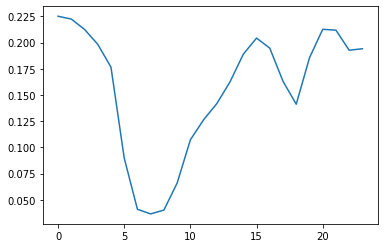

In [22]:
df2019_week['Daily'].plot()
plt.xticks([str(i) for i in range(0,24)])